<a href="https://colab.research.google.com/github/maruson08/2-2/blob/main/C)_MNIST_%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


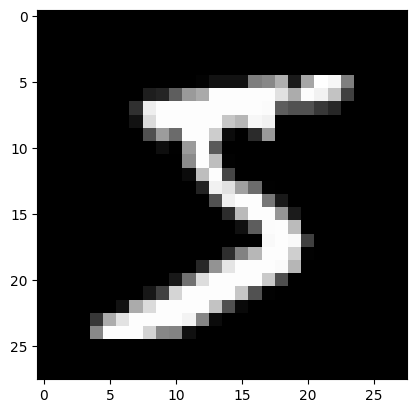

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
print(y_train[0])

5


In [5]:
for x in X_train[0]:
  for i in x:
    print('%3d'%i, end=' ')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [15]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255#빈칸
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255#빈칸

In [7]:
from keras.utils import to_categorical#빈칸
y_train = to_categorical(y_train) #빈칸: 원핫인코딩
y_test = to_categorical(y_test)#빈칸: 원핫인코딩

In [8]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
y_train.shape

(60000, 10)

In [20]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
#빈칸: 출력층

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
checkpointer = ModelCheckpoint(filepath='bestMNIST.keras', monitor='val_loss', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, callbacks=[checkpointer, earlystopper])
#validation_data: 에포크마다 검증 데이터로 사용할 데이터를 튜플로 전달한다.

Epoch 1/30
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4352 - loss: 1.8479
Epoch 1: val_loss improved from inf to 58.44809, saving model to bestMNIST.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4363 - loss: 1.8448 - val_accuracy: 0.6627 - val_loss: 58.4481
Epoch 2/30
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8154 - loss: 0.6333
Epoch 2: val_loss did not improve from 58.44809
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8155 - loss: 0.6329 - val_accuracy: 0.7109 - val_loss: 69.4260
Epoch 3/30
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8688 - loss: 0.4532
Epoch 3: val_loss improved from 58.44809 to 56.46781, saving model to bestMNIST.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8689 - loss: 0.4529 - val_accuracy: 0.7755 - val_loss: 56.4678
Epoch 4/30
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8892 - loss: 0.3802
Epoch 4: val_loss improved from 56.46781 to 52.99781, saving model to bestMNIST.keras
4

In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8961 - loss: 31.5327


[28.0559024810791, 0.9077000021934509]

In [25]:
history.history #퀴즈: 자료형이 무엇인가?

{'accuracy': [0.5945333242416382,
  0.8320333361625671,
  0.8756833076477051,
  0.8921499848365784,
  0.901449978351593,
  0.9083666801452637,
  0.9130833148956299,
  0.9180499911308289,
  0.924049973487854,
  0.9281666874885559,
  0.9311500191688538,
  0.9347666501998901,
  0.9386333227157593,
  0.942466676235199,
  0.9451666474342346,
  0.9483166933059692,
  0.951116681098938,
  0.9532166719436646,
  0.9555833339691162,
  0.9574999809265137,
  0.9603333473205566,
  0.9618666768074036,
  0.9636499881744385,
  0.9645166397094727,
  0.9666500091552734,
  0.9682833552360535,
  0.9688833355903625,
  0.9701666831970215,
  0.9720166921615601,
  0.9730333089828491],
 'loss': [1.3592685461044312,
  0.5752996802330017,
  0.43152937293052673,
  0.37160757184028625,
  0.340325266122818,
  0.31926995515823364,
  0.30126631259918213,
  0.2852453887462616,
  0.26924633979797363,
  0.2545916438102722,
  0.23984494805335999,
  0.22718359529972076,
  0.21449919044971466,
  0.20170308649539948,
  0.190

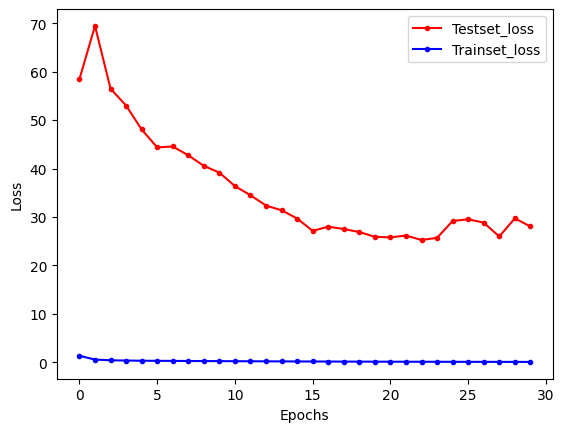

In [26]:
x_len = np.arange(len(history.history['loss']))
plt.plot(x_len, history.history['val_loss'], marker='.',c='red',label='Testset_loss')
plt.plot(x_len, history.history['loss'], marker='.',c='blue', label='Trainset_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

- 생각할 거리 1: 빨강, 파랑 선의 의미는 각각 무엇인가?
  각 에포크별 훈련 데이터의 손실 함수 값(파랑)
  각 에포크벼 검증 데이터의 손실 함수 값(빨강)
- 생각할 거리 2: 몇 에포크부터 과적합이 발생했는가? 9
- 생각할 거리 3: 몇 에포크 정도에서 학습을 중단시키는 것이 좋을까? 9